The below dataset includes all ShotSpotter alerts since the system was introduced to certain Chicago Police Department (CPD) districts in 2017. ShotSpotter is a technology designed to detect and pinpoint the location of potential outdoor gunfire. Audio sensors are installed in various CPD districts throughout the city. When at least three sensors detect a sound that the ShotSpotter software identifies as possible gunfire, the location is determined, and the alert is sent to human analysts for review. The alert is either forwarded to CPD or dismissed. Each alert can include multiple gunfire rounds, and sometimes multiple alerts may correspond to a single incident. More information about the technology and its accuracy can be found on the company’s website. It is important to note that ShotSpotter alerts may increase year-over-year due to improvements in detection sensors, even if gun violence does not necessarily increase.
It is important to note that ShotSpotter is not deployed in every CPD district, and its rollout was staggered across different districts. The system was first implemented in Chicago in 2017, and as of May 2021, sensors are present in the following districts: 002, 003, 004, 005, 006, 007, 008, 009, 010, 011, 015, and 025. You can find the link https://catalog.data.gov/dataset/violence-reduction-shotspotter-alerts.

My question is: How has the introduction of Shotspotter affected gun violence?

What is the trend in the number of incidents since implementation?

Which day of the week has the most alerts and how has that number changed over the years?

What is the trend in the number of rounds fired per incident type since implementation?



In [143]:
# import and load the data set

import pandas as pd
import numpy as np
df = pd.read_csv('Violence_Reduction_-_Shotspotter_Alerts.csv')
df.head()
df.shape

(220342, 20)

In [144]:
# Dropping unwanted columns
df.columns
print(df.columns)

df.drop(columns = ['BLOCK', 'WARD', 'COMMUNITY_AREA', 'AREA', 'BEAT', 'STREET_OUTREACH_ORGANIZATION', 'UNIQUE_ID', 'HOUR', 'ILLINOIS_HOUSE_DISTRICT', 'ILLINOIS_SENATE_DISTRICT', 'LATITUDE', 'LONGITUDE', 'LOCATION'], inplace = True)
df.columns
print(df.columns)

Index(['DATE', 'BLOCK', 'ZIP_CODE', 'WARD', 'COMMUNITY_AREA', 'AREA',
       'DISTRICT', 'BEAT', 'STREET_OUTREACH_ORGANIZATION', 'UNIQUE_ID',
       'MONTH', 'DAY_OF_WEEK', 'HOUR', 'INCIDENT_TYPE_DESCRIPTION', 'ROUNDS',
       'ILLINOIS_HOUSE_DISTRICT', 'ILLINOIS_SENATE_DISTRICT', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')
Index(['DATE', 'ZIP_CODE', 'DISTRICT', 'MONTH', 'DAY_OF_WEEK',
       'INCIDENT_TYPE_DESCRIPTION', 'ROUNDS'],
      dtype='object')


In [145]:
# checking for missing values
no_values = df.isnull().sum()
print(no_values)

DATE                           0
ZIP_CODE                     503
DISTRICT                     493
MONTH                          0
DAY_OF_WEEK                    0
INCIDENT_TYPE_DESCRIPTION      2
ROUNDS                         0
dtype: int64


In [146]:
# Dropping missing values
df = df.dropna()
print(df)


                          DATE  ZIP_CODE  DISTRICT  MONTH  DAY_OF_WEEK  \
1       07/13/2018 11:58:53 PM   60609.0       9.0      7            6   
3       05/31/2020 10:07:30 PM   60620.0       6.0      5            1   
4       05/19/2018 12:16:33 AM   60637.0       3.0      5            7   
5       06/04/2020 11:31:12 PM   60620.0       6.0      6            5   
6       08/24/2019 02:54:13 AM   60649.0       3.0      8            7   
...                        ...       ...       ...    ...          ...   
220337  09/10/2024 09:11:00 PM   60628.0       5.0      9            3   
220338  09/10/2024 01:48:09 AM   60651.0      11.0      9            3   
220339  09/10/2024 08:59:41 PM   60624.0      11.0      9            3   
220340  09/10/2024 01:41:05 AM   60628.0       5.0      9            3   
220341  09/10/2024 09:30:58 PM   60647.0      25.0      9            3   

       INCIDENT_TYPE_DESCRIPTION  ROUNDS  
1                 SINGLE GUNSHOT       1  
3                 SINGLE 

In [147]:
# checking for duplicates
duplicates = df.duplicated().sum
print(duplicates)

<bound method Series.sum of 1         False
3         False
4         False
5         False
6         False
          ...  
220337    False
220338    False
220339    False
220340    False
220341    False
Length: 219824, dtype: bool>


In [148]:
# dropping duplicates
df = df.drop_duplicates()
print(df)

                          DATE  ZIP_CODE  DISTRICT  MONTH  DAY_OF_WEEK  \
1       07/13/2018 11:58:53 PM   60609.0       9.0      7            6   
3       05/31/2020 10:07:30 PM   60620.0       6.0      5            1   
4       05/19/2018 12:16:33 AM   60637.0       3.0      5            7   
5       06/04/2020 11:31:12 PM   60620.0       6.0      6            5   
6       08/24/2019 02:54:13 AM   60649.0       3.0      8            7   
...                        ...       ...       ...    ...          ...   
220337  09/10/2024 09:11:00 PM   60628.0       5.0      9            3   
220338  09/10/2024 01:48:09 AM   60651.0      11.0      9            3   
220339  09/10/2024 08:59:41 PM   60624.0      11.0      9            3   
220340  09/10/2024 01:41:05 AM   60628.0       5.0      9            3   
220341  09/10/2024 09:30:58 PM   60647.0      25.0      9            3   

       INCIDENT_TYPE_DESCRIPTION  ROUNDS  
1                 SINGLE GUNSHOT       1  
3                 SINGLE 

In [149]:
# checking the data types
print(df.dtypes)


DATE                          object
ZIP_CODE                     float64
DISTRICT                     float64
MONTH                          int64
DAY_OF_WEEK                    int64
INCIDENT_TYPE_DESCRIPTION     object
ROUNDS                         int64
dtype: object


In [150]:
# checking for inconsistencies
category_columns = df.select_dtypes(include = ['object']).columns
print(category_columns)

for column in category_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)

Index(['DATE', 'INCIDENT_TYPE_DESCRIPTION'], dtype='object')
Unique values in DATE:
['07/13/2018 11:58:53 PM' '05/31/2020 10:07:30 PM'
 '05/19/2018 12:16:33 AM' ... '09/10/2024 08:59:41 PM'
 '09/10/2024 01:41:05 AM' '09/10/2024 09:30:58 PM']
Unique values in INCIDENT_TYPE_DESCRIPTION:
['SINGLE GUNSHOT' 'MULTIPLE GUNSHOTS' 'GUNSHOT OR FIRECRACKER']


In [151]:
# converting date format
df['DATE'] = pd.to_datetime(df['DATE'])
print(df)

df.head()

<ipython-input-151-d20fde907e2c>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DATE'] = pd.to_datetime(df['DATE'])


                      DATE  ZIP_CODE  DISTRICT  MONTH  DAY_OF_WEEK  \
1      2018-07-13 23:58:53   60609.0       9.0      7            6   
3      2020-05-31 22:07:30   60620.0       6.0      5            1   
4      2018-05-19 00:16:33   60637.0       3.0      5            7   
5      2020-06-04 23:31:12   60620.0       6.0      6            5   
6      2019-08-24 02:54:13   60649.0       3.0      8            7   
...                    ...       ...       ...    ...          ...   
220337 2024-09-10 21:11:00   60628.0       5.0      9            3   
220338 2024-09-10 01:48:09   60651.0      11.0      9            3   
220339 2024-09-10 20:59:41   60624.0      11.0      9            3   
220340 2024-09-10 01:41:05   60628.0       5.0      9            3   
220341 2024-09-10 21:30:58   60647.0      25.0      9            3   

       INCIDENT_TYPE_DESCRIPTION  ROUNDS  
1                 SINGLE GUNSHOT       1  
3                 SINGLE GUNSHOT       1  
4                 SINGLE GUNSH

,DATE,ZIP_CODE,DISTRICT,MONTH,DAY_OF_WEEK,INCIDENT_TYPE_DESCRIPTION,ROUNDS
1,2018-07-13 23:58:53,60609.0,9.0,7,6,SINGLE GUNSHOT,1
3,2020-05-31 22:07:30,60620.0,6.0,5,1,SINGLE GUNSHOT,1
4,2018-05-19 00:16:33,60637.0,3.0,5,7,SINGLE GUNSHOT,1
5,2020-06-04 23:31:12,60620.0,6.0,6,5,SINGLE GUNSHOT,1
6,2019-08-24 02:54:13,60649.0,3.0,8,7,SINGLE GUNSHOT,1


In [152]:
# checking for outliers
number_columns = df.select_dtypes(include = ['int64', 'float64']).columns
print(df[number_columns].describe())


            ZIP_CODE       DISTRICT          MONTH    DAY_OF_WEEK  \
count  218877.000000  218877.000000  218877.000000  218877.000000   
mean    60630.557048       8.393317       6.530805       3.927950   
std        23.386796       5.511680       3.367681       2.203494   
min     60608.000000       1.000000       1.000000       1.000000   
25%     60619.000000       5.000000       4.000000       2.000000   
50%     60628.000000       7.000000       7.000000       4.000000   
75%     60637.000000      10.000000       9.000000       6.000000   
max     60827.000000      25.000000      12.000000       7.000000   

              ROUNDS  
count  218877.000000  
mean        4.006035  
std         4.376955  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         5.000000  
max       201.000000  


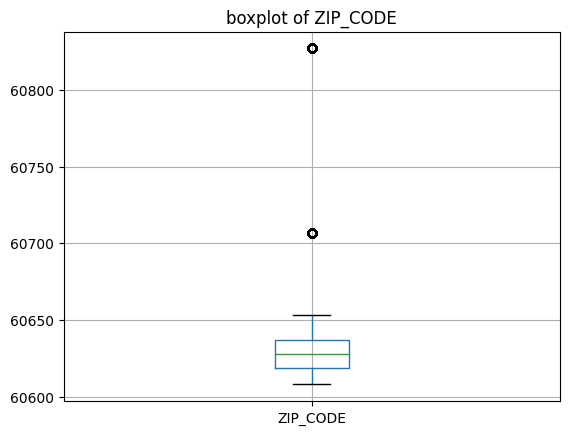

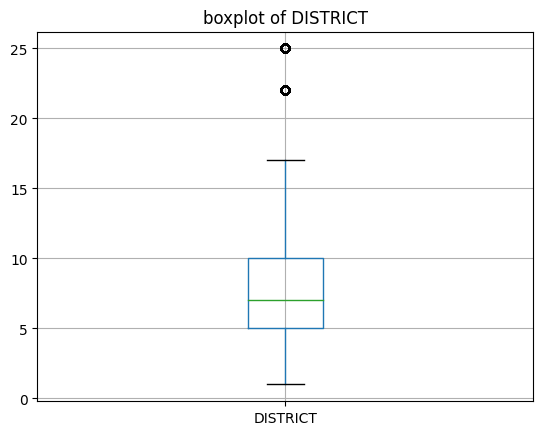

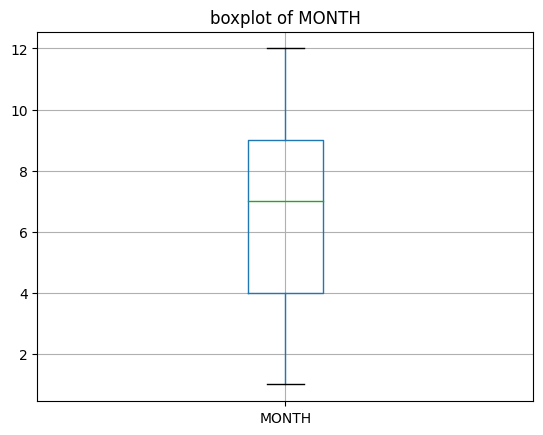

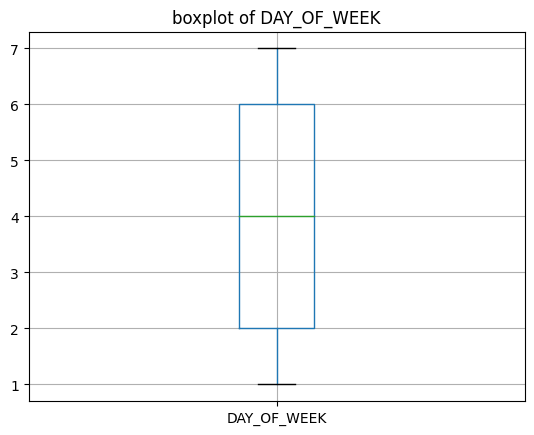

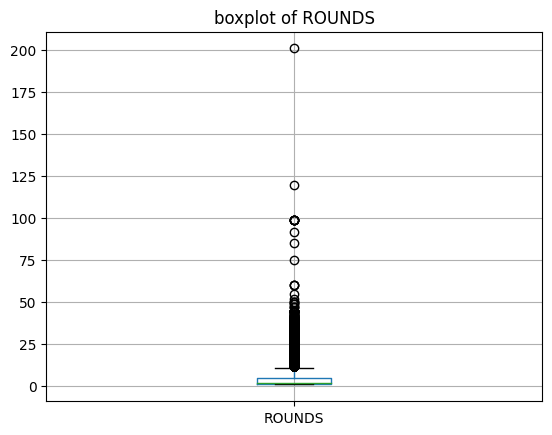

In [153]:
# reviewing outliers
import matplotlib.pyplot as plt

for col in number_columns:
  df.boxplot(column = [col])
  plt.title(f'boxplot of {col}')
  plt.show()

In [157]:
# removing outliers

zipcode_range = (60600, 60800)
district_range = (1, 15)
rounds_range = (0, 100)


removed_outliers = df[(df['ZIP_CODE'].between(*zipcode_range)) &
                     (df['DISTRICT'].between(*district_range)) &
                     (df['ROUNDS'].between(*rounds_range))]
df.head()



,DATE,ZIP_CODE,DISTRICT,MONTH,DAY_OF_WEEK,INCIDENT_TYPE_DESCRIPTION,ROUNDS
1,2018-07-13 23:58:53,60609.0,9.0,7,6,SINGLE GUNSHOT,1
3,2020-05-31 22:07:30,60620.0,6.0,5,1,SINGLE GUNSHOT,1
4,2018-05-19 00:16:33,60637.0,3.0,5,7,SINGLE GUNSHOT,1
5,2020-06-04 23:31:12,60620.0,6.0,6,5,SINGLE GUNSHOT,1
6,2019-08-24 02:54:13,60649.0,3.0,8,7,SINGLE GUNSHOT,1


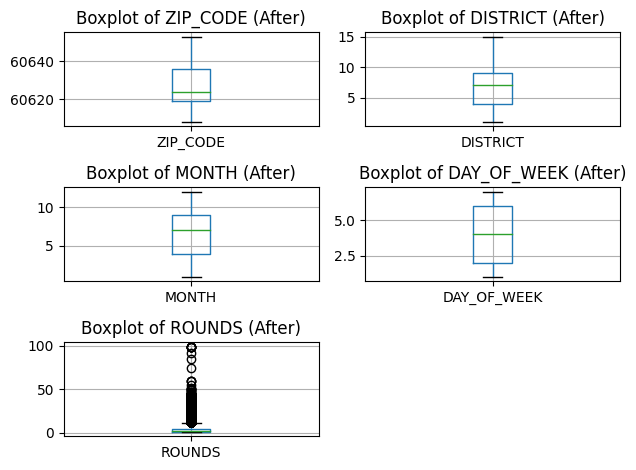

In [158]:
# reviewing data after outliers were removed

num_rows = int(np.ceil(len(number_columns) / 2))

for i, col in enumerate(number_columns):
    plt.subplot(num_rows, 2, i + 1)
    removed_outliers.boxplot(column=[col])
    plt.title(f'Boxplot of {col} (After)')

plt.tight_layout()
plt.show()




Now that the data is clean and outliers have been removed, we can answer our sub questions, the first is:
What is the trend in the number of incidents since implementation?

In [159]:
# extract the needed data from the date
df['YEAR'] = df['DATE'].dt.year

#create a pivot table to count the alerts per year

alerts_year = df.pivot_table(index = 'YEAR', values = 'INCIDENT_TYPE_DESCRIPTION', aggfunc = 'count').reset_index()
print(alerts_year)


   YEAR  INCIDENT_TYPE_DESCRIPTION
0  2017                       4679
1  2018                      15019
2  2019                      18849
3  2020                      29901
4  2021                      40070
5  2022                      38682
6  2023                      43288
7  2024                      28389


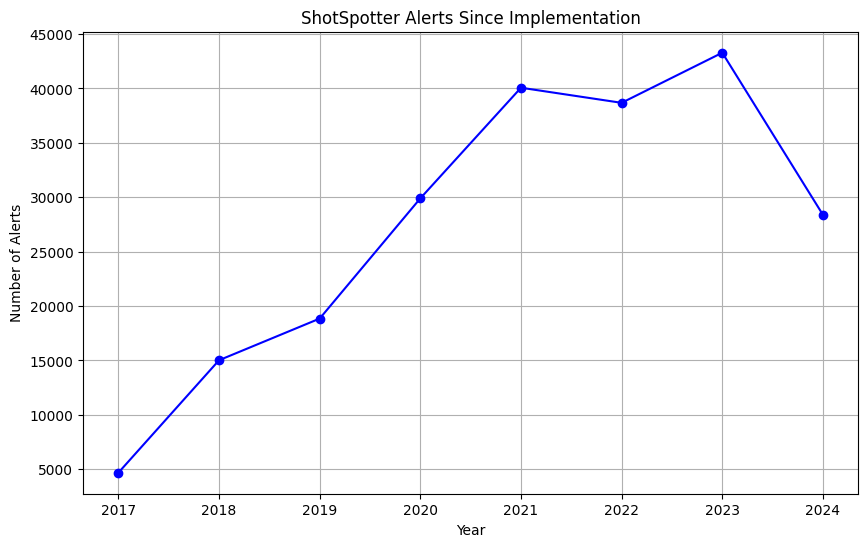

In [160]:
# creating a line graph to show the trend per year
plt.figure(figsize=(10, 6))
plt.plot(alerts_year['YEAR'], alerts_year['INCIDENT_TYPE_DESCRIPTION'], marker='o', linestyle='-', color='b')
plt.title('ShotSpotter Alerts Since Implementation')
plt.xlabel('Year')
plt.ylabel('Number of Alerts')
plt.grid(True)
plt.show()

There is an increasing trend in the number of alerts since the Shotspotter implementaion in 2017. This suggests that the system has been detecting more incidents over the years. This could be due to several factors like improved technology, expanded coverage areas, and a rise in gunfire incidents. The numbers of alerts peaked in 2023, this could be due to the factors listed above. Since its peak, there has been a slight decline from 2023 to 2024, this decrease might indicate a reduction in gunfire, changes to the systems technology or coverage area. Overall this graph provides a look into the effectiveness of the Shotspotter system over time, showcasing both its growth and potential areas of improvement.


second question: Which day of the week has the most alerts and how has that number changed over the years?

In [161]:
# extract the data
df['DAY_OF_WEEK'] = df['DATE'].dt.day_name()
df['YEAR'] = df['DATE'].dt.year


In [162]:
# create a pivot table to count alerts per day of week and year
alerts_per_day_year = df.pivot_table(index='YEAR', columns='DAY_OF_WEEK', values='INCIDENT_TYPE_DESCRIPTION', aggfunc='count').reset_index()

#filling missing values with 0
alerts_per_day_year = alerts_per_day_year.fillna(0)


print(alerts_per_day_year)

DAY_OF_WEEK  YEAR  Friday  Monday  Saturday  Sunday  Thursday  Tuesday  \
0            2017     618     542       961    1015       529      511   
1            2018    1914    2107      2944    3101      1696     1675   
2            2019    2372    2247      3637    3942      2125     2561   
3            2020    3650    4078      5164    6175      3603     3551   
4            2021    6712    5101      7005    7477      4582     4588   
5            2022    4686    5040      9146    7042      4251     4365   
6            2023    5383    5295      7580   10979      4533     4872   
7            2024    3393    5985      4891    5376      2860     3155   

DAY_OF_WEEK  Wednesday  
0                  503  
1                 1582  
2                 1965  
3                 3680  
4                 4605  
5                 4152  
6                 4646  
7                 2729  


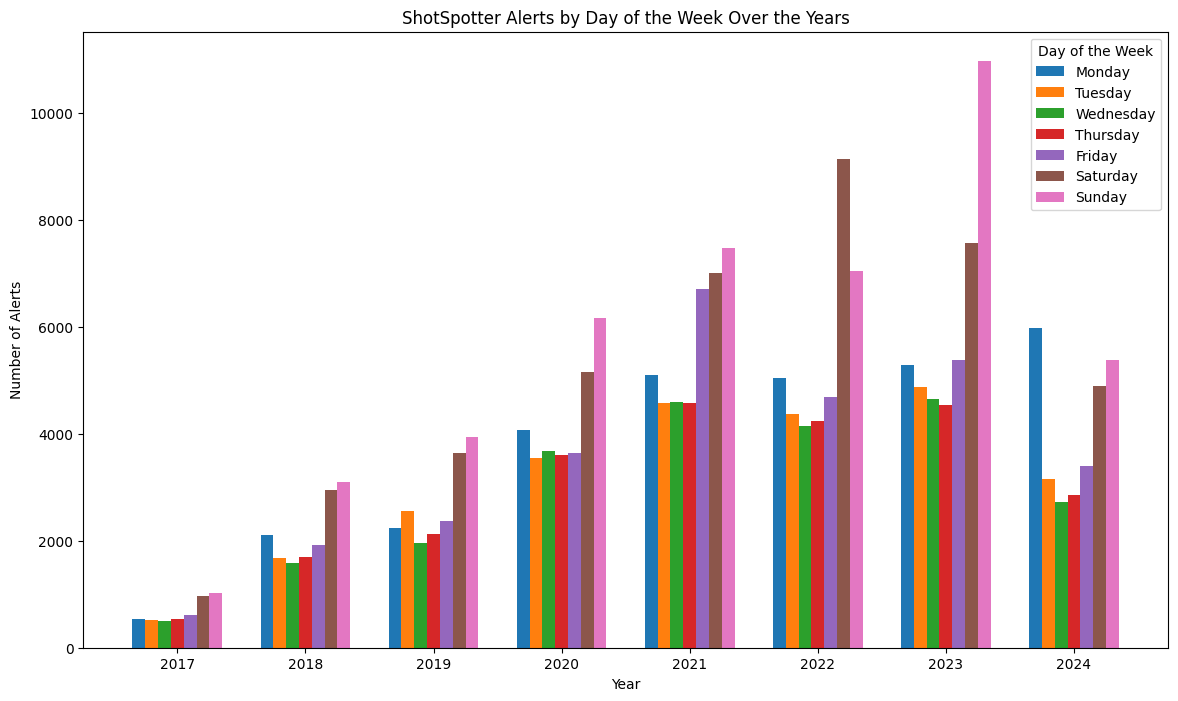

In [163]:
# create a grouped bargraph
plt.figure(figsize=(14, 8))

days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bar_width = 0.1
years = alerts_per_day_year['YEAR']

# Create a bar for each day of the week
for i, day in enumerate(days_of_week):
    plt.bar(years + i * bar_width, alerts_per_day_year[day], width=bar_width, label=day)

plt.title('ShotSpotter Alerts by Day of the Week Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Alerts')
plt.xticks(years + bar_width * 3, years)

plt.legend(title='Day of the Week')
plt.show()

ShotSpotter Alerts by Day of the Week Over the Years provides a detailed view of the number of alerts recorded for each day of the week from 2017 to 2024. The chart shows fluctuations in the number of alerts across different years, with a noticeable increase from 2017 to 2023 and a slight decline in 2024. Sunday consistently has the highest number of alerts across most years, indicating that gunfire incidents are more frequent on Sundays than any other day of the week. The number of alerts for each day of the week varies year by year, with 2023 showing a peak in alerts for several days and 2024 showing a slight decrease across all days. The chart highlights that weekends (Saturday and Sunday) generally have higher alerts compared to weekdays, suggesting that gunfire incidents are more likely to occur during weekends the exception being in 2024 where most alerts are happening on Sunday and Monday. The chart provides valuable insights into the distribution of gunfire incidents detected by ShotSpotter across different days of the week and years, with the consistent high number of alerts on Sundays suggesting a pattern that could be useful for law enforcement and community planning. The overall increase in alerts until 2023, followed by a slight decline in 2024, may indicate changes in gunfire activity or improvements in detection technology.

Third question : What is the trend in the number of rounds fired per incident type since implementation?

In [219]:
# Extract the year from the DATE column
df['YEAR'] = df['DATE'].dt.year

# Calculate the average number of rounds fired per incident per year
rounds_per_incident = df.groupby('YEAR')['ROUNDS'].mean().reset_index()

# Calculate the incident type distribution per year
incident_type_distribution = df.groupby(['YEAR', 'INCIDENT_TYPE_DESCRIPTION']).size().reset_index(name='COUNT')



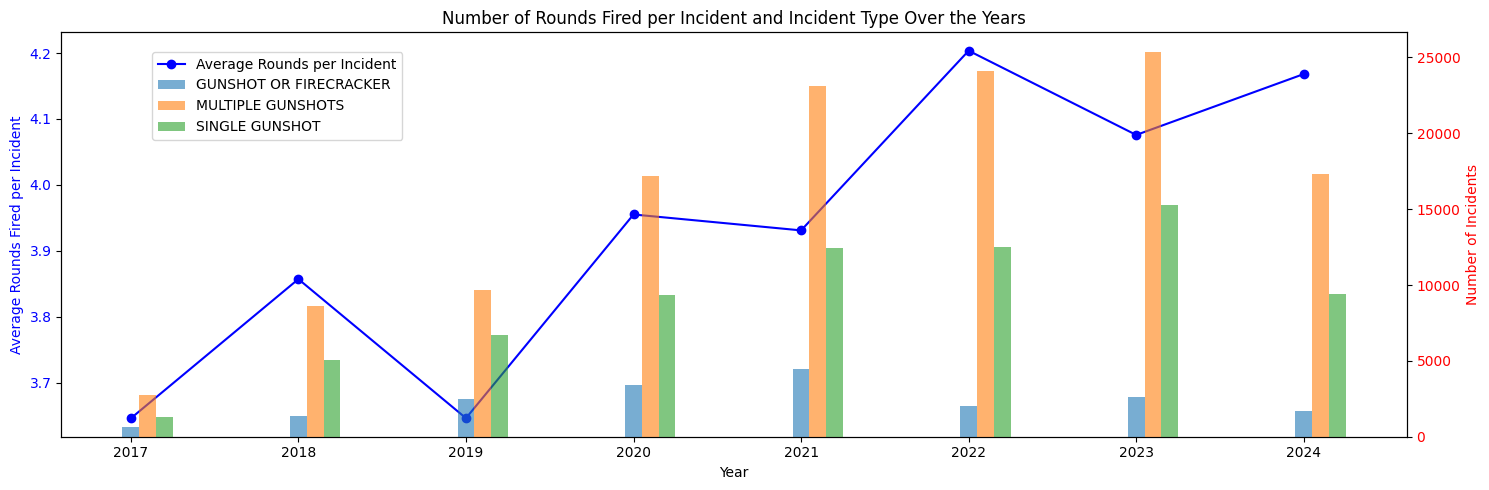

In [223]:
# Create the combined plots
fig, ax1 = plt.subplots(figsize=(15, 5))

# Plot the trend in the number of rounds fired per incident
ax1.plot(rounds_per_incident['YEAR'], rounds_per_incident['ROUNDS'], marker='o', linestyle='-', color='b', label='Average Rounds per Incident')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Rounds Fired per Incident', color='b')
ax1.tick_params(axis='y', labelcolor='b')


# Create a secondary y-axis for incidents
ax2 = ax1.twinx()

# Ploting the incident type as bar charts
incident_types = incident_type_distribution['INCIDENT_TYPE_DESCRIPTION'].unique()
width = 0.1  # Width of the bars
for i, incident_type in enumerate(incident_types):
    data = incident_type_distribution[incident_type_distribution['INCIDENT_TYPE_DESCRIPTION'] == incident_type]
    ax2.bar(data['YEAR'] + i * width, data['COUNT'], width=width, label=incident_type, alpha=0.6)

ax2.set_ylabel('Number of Incidents', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a legend for the bar charts
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Set the title
plt.title('Number of Rounds Fired per Incident and Incident Type Over the Years')

# Adjust layout
plt.tight_layout()
plt.show()

Number of Rounds Fired per Incident and Incident Type Over the Years combines a line graph and bar graphs to show gunfire incidents from 2017 to 2024. The blue line graph indicates that the average number of rounds fired per incident fluctuated over the years, peaking around 2022. The bar graphs show that incidents involving multiple gunshots are generally higher than those involving single gunshots. This information helps understand the severity and patterns of gun violence, which can guide law enforcement and policymakers in resource allocation and intervention strategies.

Summary of findings:

The analysis showed a trend in the number of gunfire incidents by ShotSpotter since its implementation. There was a steady increase from 2017 to 2021 with a small decrease in 2022 another spike in 2023 and another decrease for the data collected up to 9/14/2024. The data also showed us that the day with the most alerts was Sunday. Sunday consistently had the highest number of alerts compared to other days of the week. The data also gave us the trend in the number of rounds fired per incident with 2022 having the highest number even though 2023 had the highest number of alerts. In the analysis we can see that incident types with the highest number are multiple gunshots, as was expected.
Some things that I failed to find was the impact arrests and crime reduction. There was no data to support the direct impact of ShotSpotter's effectiveness. I would have liked to have arrests made for incidents but that was not in the data, this way I could have mapped arrests made to alerts to have a much clearer picture of the effectiveness of ShotSpotter. I also noticed when reviewing the data in excel, and something that I did not even consider, was special occasion alerts. When looking at the data to verify some of the findings I noticed that December 31, 12:00am to January 1, 12:15am, there were many gunshots across multiple zipcodes and districts.
